In [75]:
import geopandas as gpd
import pandas as pd

In [76]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/Bairro Jardim Pinheiros.dxf', encoding='ANSI_1252')

In [77]:
gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [78]:
gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [79]:
gdf_dxf2

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,PASSAGEM SANTOS DIAS DA SILVA - DJI_0042,None,AcDbEntity:AcDbPolyline,Continuous,2A3,None,"LINESTRING (338840.785 7373796.688, 338840.863..."
1,RUA NEUCI LOPES DE FREITAS - DJI_0044,None,AcDbEntity:AcDbPolyline,Continuous,2A4,None,"LINESTRING (338677.610 7373952.708, 338692.796..."
2,RUA AÃUCENA - DJI_0045,None,AcDbEntity:AcDbPolyline,Continuous,2A5,None,"LINESTRING (338963.979 7373989.518, 338891.754..."
3,RUA SAMUEL PEREIRA DOS SANTOS - DJI_0046,None,AcDbEntity:AcDbPolyline,Continuous,2A6,None,"LINESTRING (338958.751 7373949.313, 338691.132..."
4,RUA UNIÃO DAS VILAS - DJI_0047,None,AcDbEntity:AcDbPolyline,Continuous,2A7,None,"LINESTRING (338953.422 7373908.336, 338700.584..."
5,RUA CARLOS CÃSAR DE CARVALHO - DJI_0048,None,AcDbEntity:AcDbPolyline,Continuous,2A8,None,"LINESTRING (338716.893 7373804.909, 338730.144..."
6,RUA FREI TITO DE ALENCAR LIMA - DJI_0049,None,AcDbEntity:AcDbPolyline,Continuous,2A9,None,"LINESTRING (338702.429 7373757.754, 338730.051..."
7,RUA IÃDA LUIZA DE SOUZA - DJI_0043,None,AcDbEntity:AcDbPolyline,Continuous,2AA,None,"LINESTRING (338730.219 7373765.341, 338727.828..."


In [80]:
gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

<AxesSubplot:>

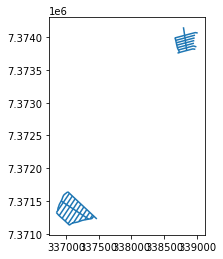

In [81]:
gdf_dxf.plot()

In [82]:
gdf_dxf['logradouro'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str[0:-11]

In [83]:
gdf_dxf['FileName'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str[-8:] + '.MOV'

In [84]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'logradouro', 'FileName'],
      dtype='object')

In [85]:
gdf_dxf['path-arquivo'] = 'videos/' + gdf_dxf.FileName

In [86]:
links_file = open('./videos/link-videos.txt', 'r')
l = []

for line in links_file:
    l.append([line[0:8].replace(' ', '_') + '.MOV', line[9:20]])

In [87]:
gdf_dxf.set_index('FileName', inplace=True)

In [88]:
gdf_dxf['YouTube-Link'] = pd.DataFrame(l, columns=['FileName', 'YouTube-Link']).set_index('FileName')['YouTube-Link']

In [89]:
gdf_dxf['URL-YouTube'] = 'https://www.youtube.com/watch?v=' + gdf_dxf['YouTube-Link']

<AxesSubplot:>

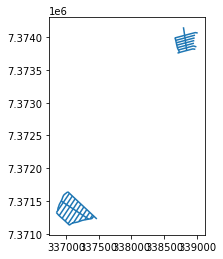

In [90]:
gdf_dxf.plot()

In [91]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text'], axis=1).to_file('./videos/linhas-de-voo-retificadas.gpkg', driver='GPKG')

In [93]:
# gdf_dxf